In [105]:
#import the package "Pandas" into Jupyter Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#You need to tell which column of the csv file you want to set as index
colnames = ['Name', 'A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
sector_data = pd.read_csv('stock_tables/sector_performance_av.csv', names=colnames)

sector_data.head()

,Name,A,B,C,D,E,F,G,H,I,J
0,NaN,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
1,Health Care,0.0189,-0.0022,-0.0088,-0.018000000000000002,0.061399999999999996,-0.012,0.0888,0.2809,0.3671,2.4873
2,Industrials,0.0163,0.0129,-0.0139,-0.08259999999999999,0.0758,-0.1642,-0.1107,-0.0206,0.2433,1.3143
3,Financials,0.014199999999999999,0.0348,0.0215,-0.0992,0.0044,-0.23739999999999997,-0.16399999999999998,-0.0617,0.1894,0.9947
4,Materials,0.0129,0.0175,0.0076,-0.016399999999999998,0.129,-0.054299999999999994,0.0095,0.075,0.2364,0.9783


In [106]:
# getting data as a list
sector = sector_data.Name.tolist() #name of bubble
#sector[1:]
year_perf = sector_data.G.tolist() #value of bubble

# source: https://eresearch.fidelity.com/eresearch/markets_sectors/sectors/sectors_in_market.jhtml 
#Market Cap in billions of dollars
market_cap = [6250, 3720, 5630, 1860, 1940, 6090, 1370, 3410, 4900, 10360, 1170]

#Ranking the values of the sector changes 
int_sector_rank = []

sector_rank = year_perf[1:]
#print(sector_rank)
for x in sector_rank:
    int_sector_rank.append(float(x)*100)

#int_sector_rank.sort()
#print(int_sector_rank)

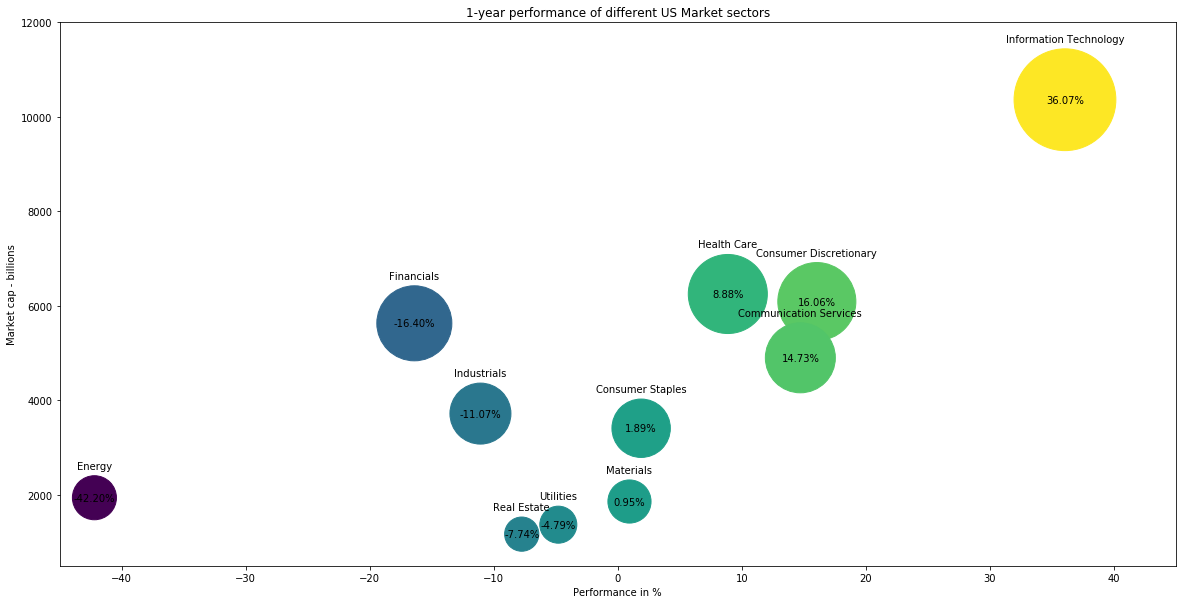

In [112]:
fig, ax = plt.subplots(figsize=(20,10))
#{-50%, 50%} percentage in changes 
#{0, 12} billions of dollars market capitalisation
ax.axis([-45,45,500,12000])
ax.scatter(int_sector_rank, market_cap,s=market_cap,marker='o', c=int_sector_rank)


#label each bubble
for n,c,r in zip(sector[1:],market_cap,int_sector_rank):
    plt.annotate("{:.2f}%".format(r),xy=(r, c), ha="center", va="center")
    plt.annotate(n ,xy=(r, c), xytext=(0,np.sqrt(c)/2.+5), 
                 textcoords="offset points", ha="center", va="bottom")

#Label axis
plt.title("1-year performance of different US Market sectors")
plt.xlabel('Performance in %')
plt.ylabel('Market cap - billions')
plt.show()